# CLS study

In [54]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

## Loading the data (from npy files)

We will load the data we created thanks to the *data_cls.py* file.

In [55]:
with open('numpy_save/flaubert_raw_layer_12.npy', 'rb') as f:
    train_fl_12 = np.load(f)
    train_label_fl_12 = np.load(f)
    test_fl_12 = np.load(f)
    test_label_fl_12 = np.load(f)

In [56]:
with open('numpy_save/flaubert_raw_layer_13.npy', 'rb') as f:
    train_fl_13 = np.load(f)
    train_label_fl_13 = np.load(f)
    test_fl_13 = np.load(f)
    test_label_fl_13 = np.load(f)

In [57]:
with open('numpy_save/flaubert_ft.npy', 'rb') as f:
    train_fl_ft = np.load(f)
    train_label_fl_ft = np.load(f)
    test_fl_ft = np.load(f)
    test_label_fl_ft = np.load(f)

## Construction of the keras model

In [58]:
import tensorflow
from tensorflow.keras.models import Sequential  # --> add layers on each
from tensorflow.keras.layers import Dense  # --> feed forward layer
from tensorflow.keras import Input  # --> for the input shape of the model
from tensorflow.keras import optimizers

In [59]:
def model_creation():
    model = Sequential()
    model.add(Input(shape=(768,)))
    model.add(Dense(units=1, activation="sigmoid"))
    return model

## Some functions for the training perf visu

In [60]:
def visu_perf_model(history: tensorflow.keras.callbacks.History
                    )-> matplotlib.figure.Figure:
    # Get training and test loss histories
    training_loss = history.history["loss"]
    test_loss = history.history["val_loss"]
    # Create count of the number of epochs
    epoch_count = range(1, len(training_loss) + 1)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

    # --> visualisation of the loss
    ax1.plot(epoch_count, training_loss, "r--")
    ax1.plot(epoch_count, test_loss, "b-")
    ax1.legend(["Training Loss", "Test Loss"])
    ax1.set(xlabel="Epoch", ylabel="Loss")
    ax1.set_title("LOSS VISU")

    # --> visualisation of the accuracy
    training_accuracy = history.history["accuracy"]
    test_accuracy = history.history["val_accuracy"]

    ax2.plot(epoch_count, training_accuracy, "r--")
    ax2.plot(epoch_count, test_accuracy, "b-")
    # Visualize accuracy history
    ax2.legend(["Training Accuracy", "Test Accuracy"])
    ax2.set(xlabel="Epoch", ylabel="Accuracy")
    ax2.set_title("ACC VISU")

    return fig

## The study

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 1)                 769       
Total params: 769
Trainable params: 769
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
188/188 [==============================] - 1s 4ms/step - loss: 0.7088 - accuracy: 0.5869 - val_loss: 0.6081 - val_accuracy: 0.6713
Epoch 2/30
188/188 [==============================] - 1s 3ms/step - loss: 0.5837 - accuracy: 0.6919 - val_loss: 0.5732 - val_accuracy: 0.7035
Epoch 3/30
188/188 [==============================] - 0s 2ms/step - loss: 0.5541 - accuracy: 0.7208 - val_loss: 0.5618 - val_accuracy: 0.7098
Epoch 4/30
188/188 [==============================] - 0s 2ms/step - loss: 0.5459 - accuracy: 0.7230 - val_loss: 0.5568 - val_accuracy: 0.7150
Epoch 5/30
188/188 [==============================] - 0s 2ms/step - loss: 0.5491 

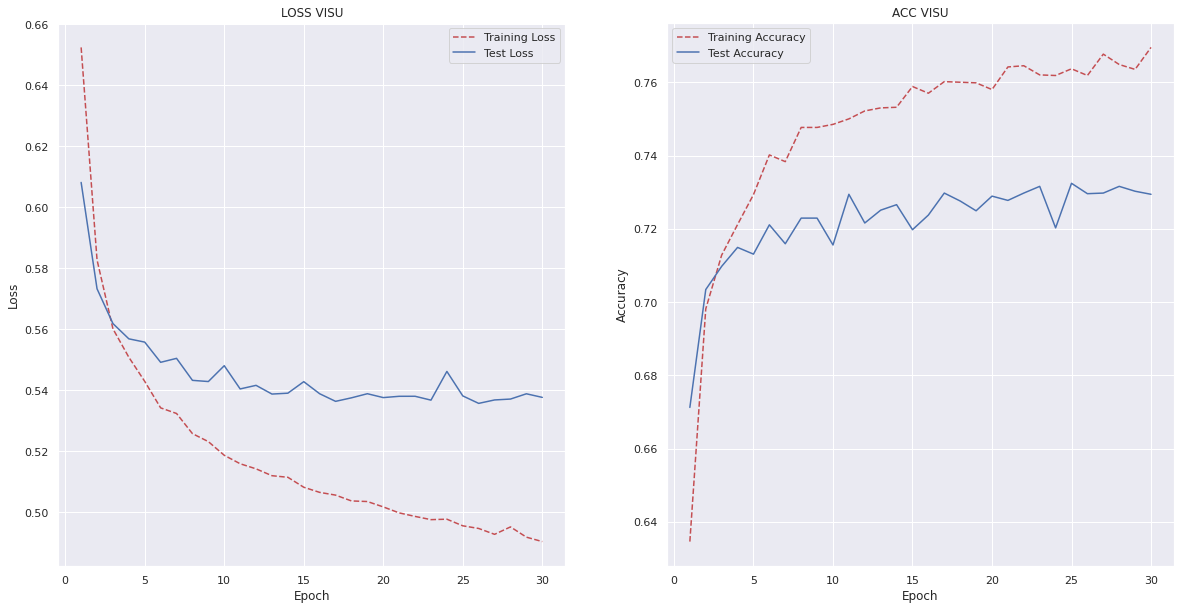

In [61]:
model_1 = model_creation()

X_train = train_fl_12
y_train = train_label_fl_12

X_test = test_fl_12
y_test = test_label_fl_12

opt = optimizers.Adam(learning_rate=0.001)

model_1.compile(loss="binary_crossentropy",
                optimizer=opt,
                metrics=["accuracy"])

model_1.summary()

history = model_1.fit(X_train,
                      y_train,
                      epochs=30,
                      verbose=1,
                      batch_size=32,
                      validation_data=(X_test, y_test),
                      )

fig = visu_perf_model(history)

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 1)                 769       
Total params: 769
Trainable params: 769
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
60/60 [==============================] - 1s 8ms/step - loss: 0.7323 - accuracy: 0.5555 - val_loss: 0.6146 - val_accuracy: 0.6674
Epoch 2/30
60/60 [==============================] - 0s 4ms/step - loss: 0.5900 - accuracy: 0.6895 - val_loss: 0.5827 - val_accuracy: 0.7003
Epoch 3/30
60/60 [==============================] - 0s 5ms/step - loss: 0.5771 - accuracy: 0.7057 - val_loss: 0.5669 - val_accuracy: 0.7143
Epoch 4/30
60/60 [==============================] - 0s 4ms/step - loss: 0.5457 - accuracy: 0.7273 - val_loss: 0.5582 - val_accuracy: 0.7213
Epoch 5/30
60/60 [==============================] - 0s 4ms/step - loss: 0.5282 - accuracy

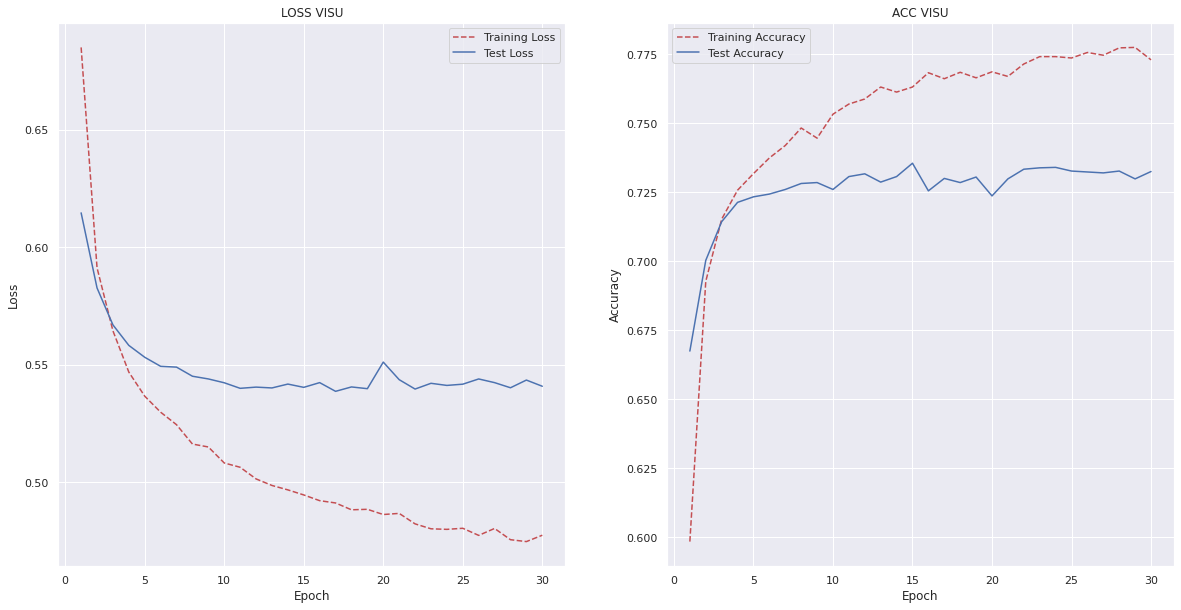

In [62]:
model_2 = model_creation()

X_train = train_fl_13
y_train = train_label_fl_13

X_test = test_fl_13
y_test = test_label_fl_13

opt = optimizers.Adam(learning_rate=0.001)

model_2.compile(loss="binary_crossentropy",
                optimizer=opt,
                metrics=["accuracy"])

model_2.summary()

history = model_2.fit(X_train,
                      y_train,
                      epochs=30,
                      verbose=1,
                      batch_size=100,
                      validation_data=(X_test, y_test),
                      )

fig = visu_perf_model(history)

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 1)                 769       
Total params: 769
Trainable params: 769
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
60/60 [==============================] - 1s 10ms/step - loss: 0.2892 - accuracy: 0.8791 - val_loss: 0.1998 - val_accuracy: 0.9288
Epoch 2/30
60/60 [==============================] - 0s 5ms/step - loss: 0.1564 - accuracy: 0.9476 - val_loss: 0.1966 - val_accuracy: 0.9300
Epoch 3/30
60/60 [==============================] - 0s 6ms/step - loss: 0.1519 - accuracy: 0.9473 - val_loss: 0.1936 - val_accuracy: 0.9298
Epoch 4/30
60/60 [==============================] - 0s 4ms/step - loss: 0.1587 - accuracy: 0.9445 - val_loss: 0.1942 - val_accuracy: 0.9302
Epoch 5/30
60/60 [==============================] - 0s 4ms/step - loss: 0.1589 - accurac

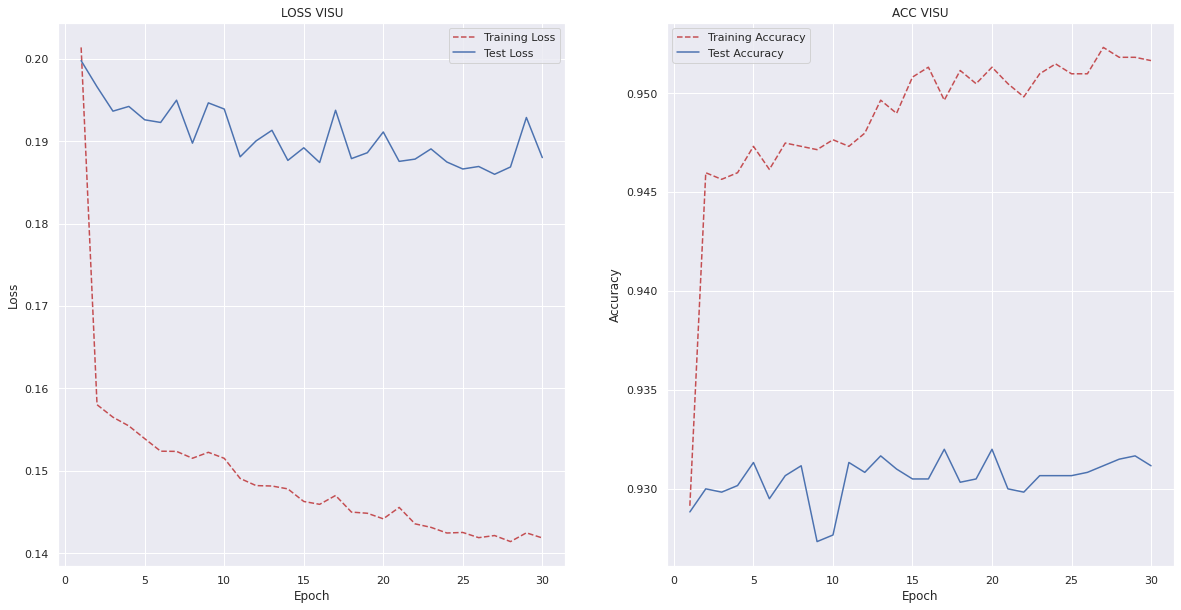

In [63]:
model_3 = model_creation()

X_train = train_fl_ft
y_train = train_label_fl_ft

X_test = test_fl_ft
y_test = test_label_fl_ft

opt = optimizers.Adam(learning_rate=0.001)

model_3.compile(loss="binary_crossentropy",
                optimizer=opt,
                metrics=["accuracy"])

model_3.summary()

history = model_3.fit(X_train,
                      y_train,
                      epochs=30,
                      verbose=1,
                      batch_size=100,
                      validation_data=(X_test, y_test),
                      )

fig = visu_perf_model(history)